In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn import utils
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

In [4]:
df = pd.read_csv(r'C:\Users\mayan\OneDrive\Documents\datasets\abalone.csv')
df.dtypes

Sex                object
Length              int64
Diameter            int64
Height              int64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
con = [
    (df['Rings'] <= 7),
    (df['Rings'] > 7) & (df['Rings'] <= 10),
    (df['Rings'] >= 11) & (df['Rings'] <= 15),
    (df['Rings'] > 15)
    ]
val = [1, 2, 3, 4]
df['Class'] = np.select(con, val)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Class
0,M,91,73,19,102.8,44.9,20.2,30.0,15,3
1,M,70,53,18,45.1,19.9,9.7,14.0,7,1
2,F,106,84,27,135.4,51.3,28.3,42.0,9,2
3,M,88,73,25,103.2,43.1,22.8,31.0,10,2
4,I,66,51,16,41.0,17.9,7.9,11.0,7,1


In [6]:
dfef = pd.get_dummies(df, columns= ['Sex'])
dfef.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Class,Sex_F,Sex_I,Sex_M
0,91,73,19,102.8,44.9,20.2,30.0,15,3,0,0,1
1,70,53,18,45.1,19.9,9.7,14.0,7,1,0,0,1
2,106,84,27,135.4,51.3,28.3,42.0,9,2,1,0,0
3,88,73,25,103.2,43.1,22.8,31.0,10,2,0,0,1
4,66,51,16,41.0,17.9,7.9,11.0,7,1,0,1,0


In [7]:
dfef = dfef.drop(['Rings'], axis=1)
dfef

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Class,Sex_F,Sex_I,Sex_M
0,91,73,19,102.8,44.9,20.2,30.0,3,0,0,1
1,70,53,18,45.1,19.9,9.7,14.0,1,0,0,1
2,106,84,27,135.4,51.3,28.3,42.0,2,1,0,0
3,88,73,25,103.2,43.1,22.8,31.0,2,0,0,1
4,66,51,16,41.0,17.9,7.9,11.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,113,90,33,177.4,74.0,47.8,49.8,3,1,0,0
4173,118,88,27,193.2,87.8,42.9,52.1,2,0,0,1
4174,120,95,41,235.2,105.1,57.5,61.6,2,0,0,1
4175,125,97,30,218.9,106.2,52.2,59.2,2,1,0,0


**Train Test Split**

In [8]:
xr = dfef[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Sex_F','Sex_I','Sex_M']]
x = xr.to_numpy()
yr = dfef['Class']
y = yr.to_numpy()
y = y.flatten()

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.4, random_state=42, shuffle=True)

**Neural Network**

### 1 Layer

In [ ]:
max_exp = 100
alv = []    
for i in range(1,max_exp):
    clf = MLPClassifier(random_state=42, max_iter=600,hidden_layer_sizes=(1,i), activation='relu', solver='adam')
    clf.fit(xtrain, ytrain)
    score = clf.score(xtest, ytest)
    alv.append([i,score])
nad = pd.DataFrame(data = alv, columns = ['No of Neurons', 'Mean Score'])

C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multil

C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multil

C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multil

C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multil

C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multil

C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multil

C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mayan\anaconda\lib\site-packages\sklearn\neural_network\_multil

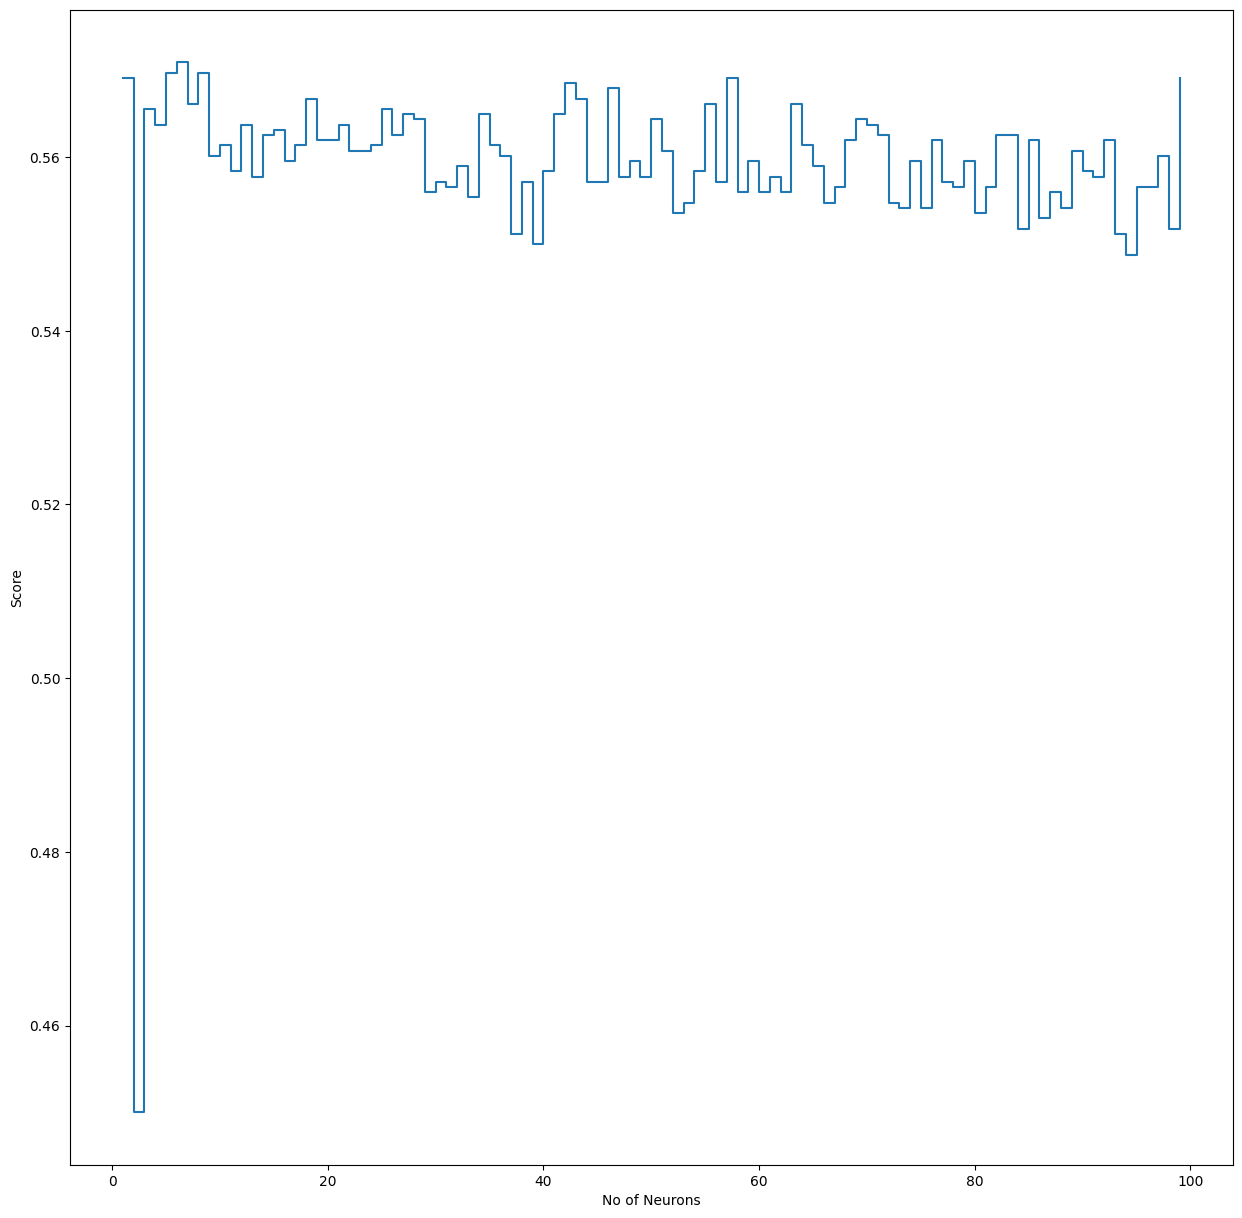

In [9]:
fig, ax =plt.subplots()
ax.set_xlabel('No of Neurons')
ax.set_ylabel('Score')
ax.plot(nad['No of Neurons'], nad['Mean Score'], drawstyle="steps-post")
plt.show()

In [10]:
nn1a = nad.sort_values(by=['Mean Score'],ascending=False)
n1a = nn1a.iloc[0,0]
n1a

6

In [11]:
max_exp = 100
alv = []    
for i in range(1,max_exp):
    clf = MLPClassifier(random_state=42, max_iter=600,hidden_layer_sizes=(i,n1a), activation='relu', solver='adam')
    clf.fit(xtrain, ytrain)
    score = clf.score(xtest, ytest)
    alv.append([i,score])
nnla = pd.DataFrame(data = alv, columns = ['No of Layers', 'Mean Score'])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


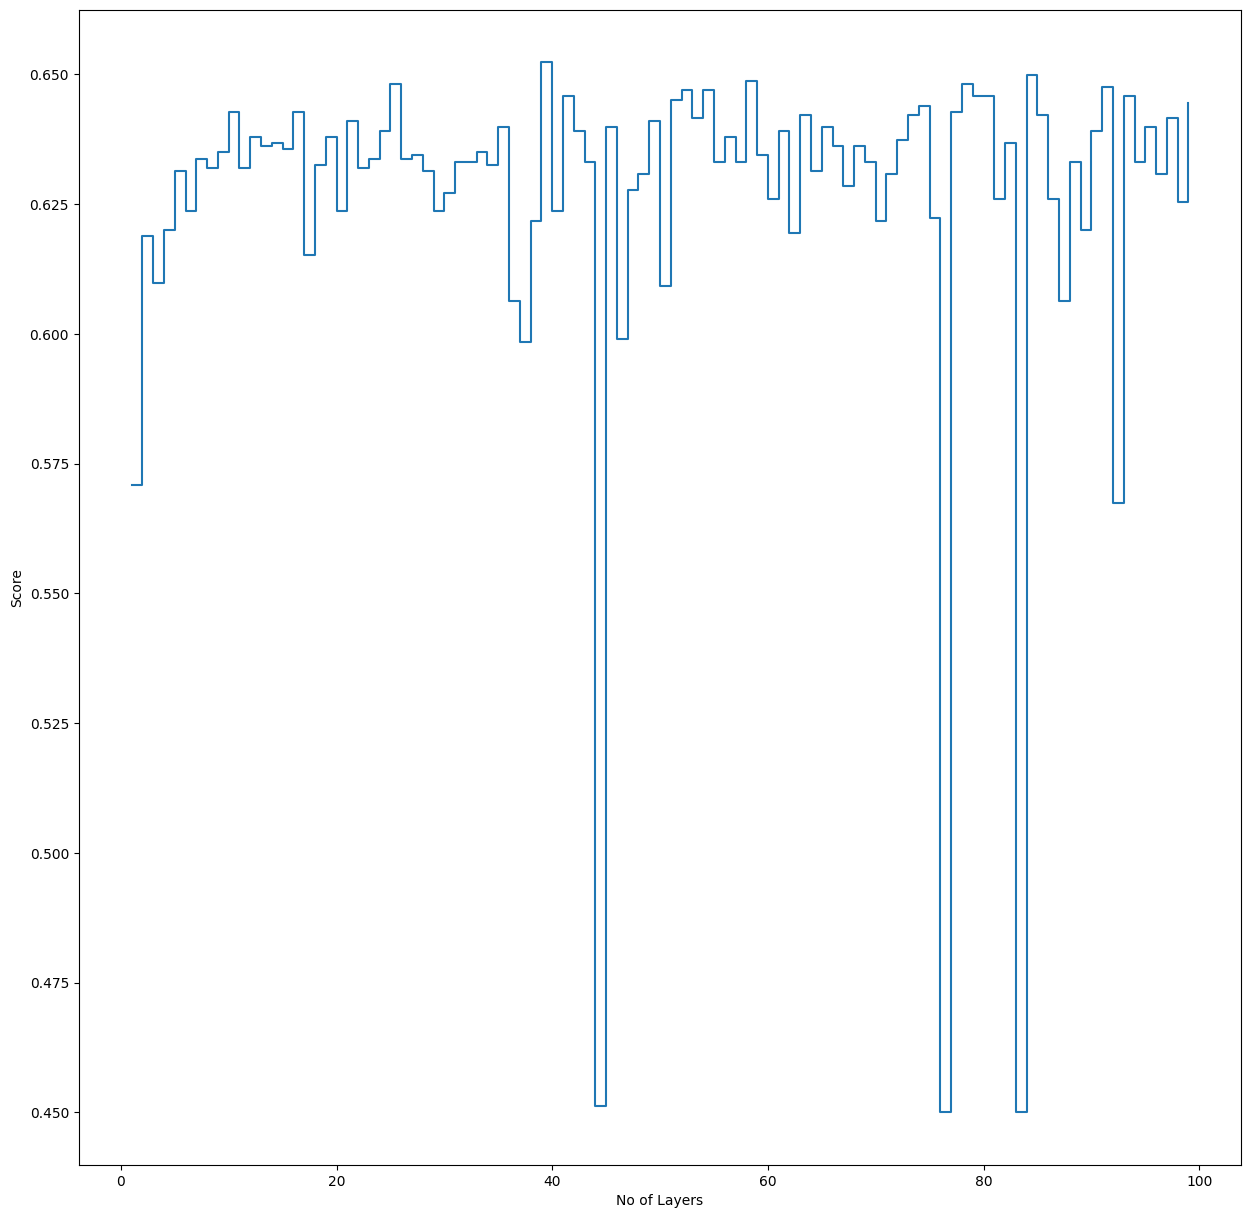

In [12]:
fig, ax =plt.subplots()
ax.set_xlabel('No of Layers')
ax.set_ylabel('Score')
ax.plot(nnla['No of Layers'], nnla['Mean Score'], drawstyle="steps-post")
plt.show()

In [13]:
nnlla = nnla.sort_values(by=['Mean Score'],ascending=False)
n1llra = nnlla.iloc[0,0]
n1llra

39

In [14]:
alv = []    
for i in np.arange(0.0001, 0.1, 0.0001, dtype=float):
    clflr = MLPClassifier(random_state=42, max_iter=600,hidden_layer_sizes=(n1llra,n1a), learning_rate_init=i, activation='relu', solver='adam')
    clflr.fit(xtrain, ytrain)
    score = clflr.score(xtest, ytest)
    alv.append([i,score])
nnlr = pd.DataFrame(data = alv, columns = ['Learning Rate', 'Mean Score'])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


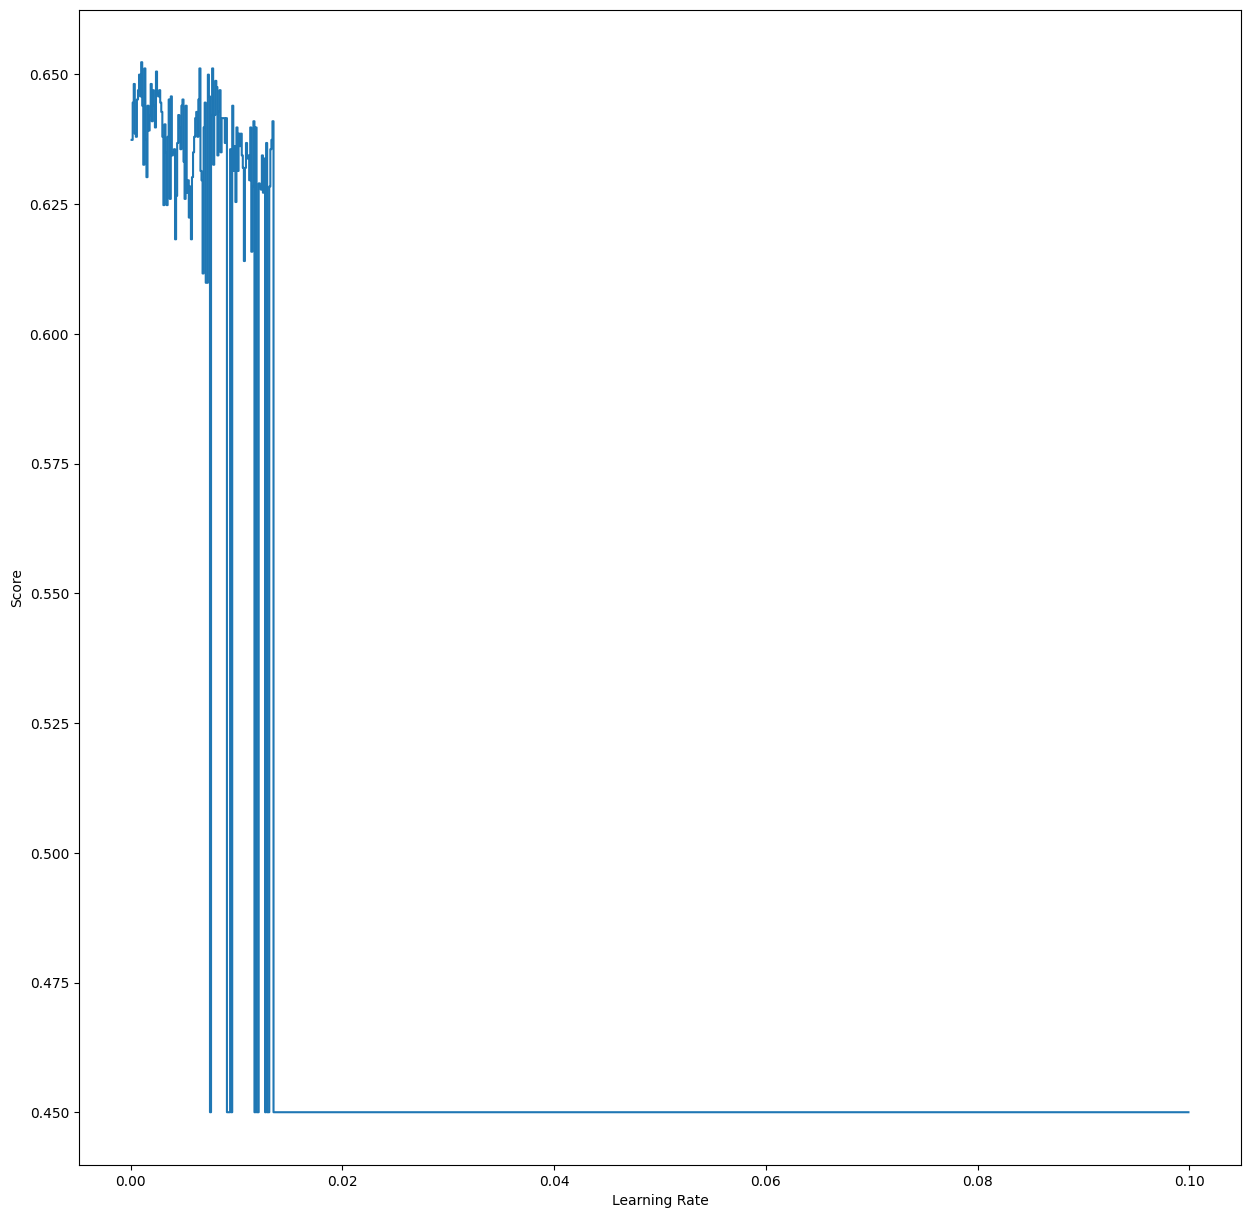

In [15]:
fig, ax =plt.subplots()
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Score')
ax.plot(nnlr['Learning Rate'], nnlr['Mean Score'], drawstyle="steps-post")
plt.show()

In [16]:
nnlra = nnlr.sort_values(by=['Mean Score'],ascending=False)
n1lra = nnlra.iloc[0,0]
n1lra

0.001

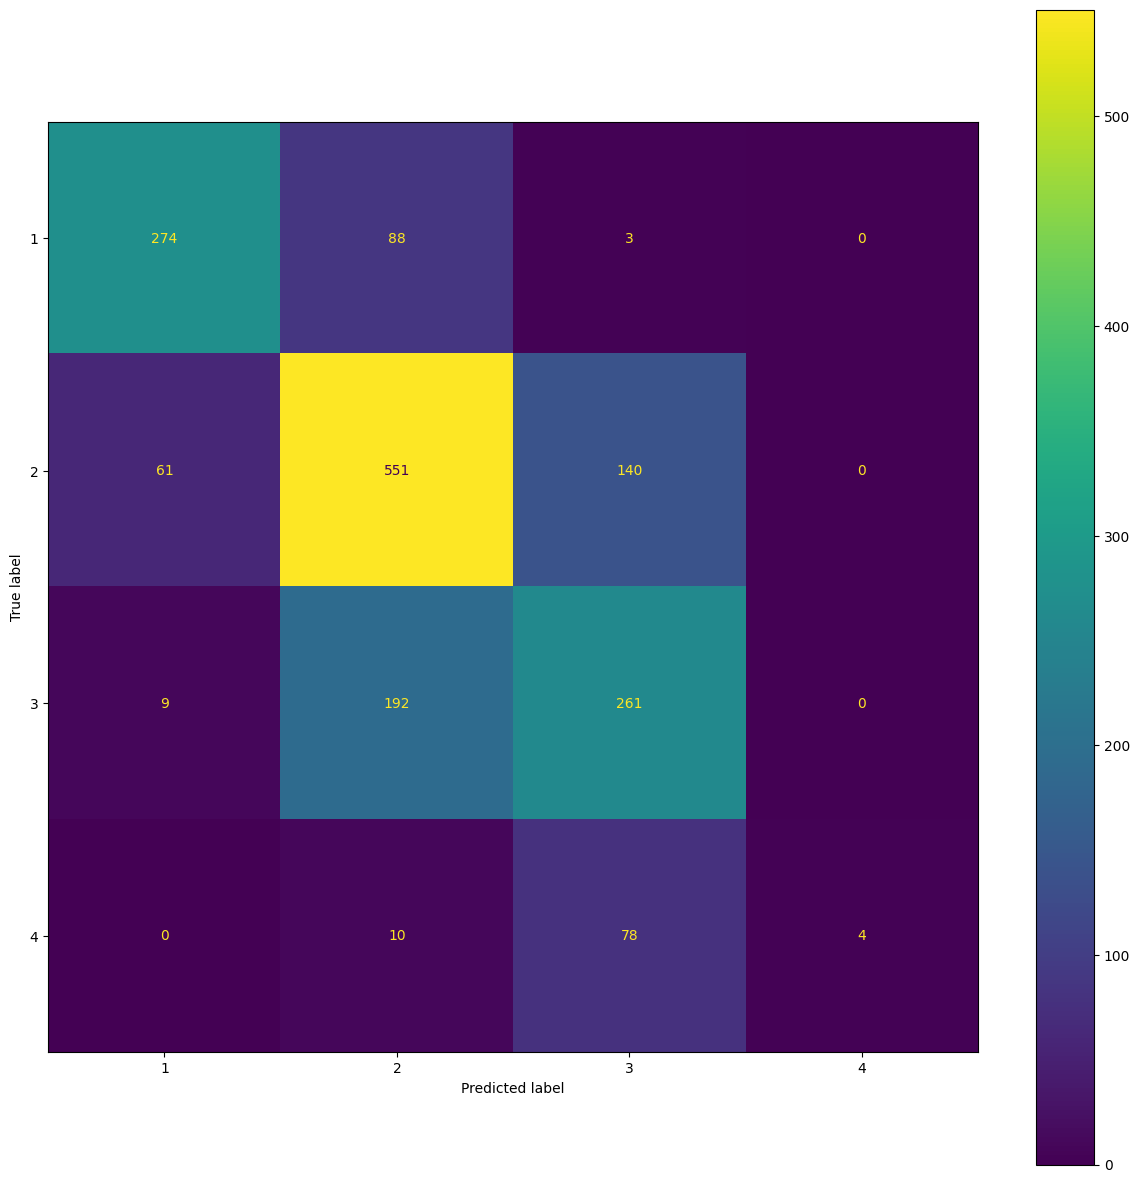

In [17]:
clfa = MLPClassifier(random_state=42, max_iter=600,hidden_layer_sizes=(n1llra,n1a), learning_rate_init = n1lra, activation='relu', solver='adam')
clfa.fit(xtrain, ytrain)
ypred = clfa.predict(xtest)
cm = confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clfa.classes_)
disp.plot()
plt.show()

In [18]:
clfa.score(xtest, ytest)

0.6523040095751047

In [19]:
cross_val_score(clfa, x, y, cv = 10).mean()

0.6267684417059652

In [20]:
max_exp = 100
alv = []    
for i in range(1,max_exp):
    bct = BaggingClassifier(clfa, n_estimators = i, max_samples = 0.8, oob_score = False, random_state = 42)
    bct.fit(xtrain, ytrain)
    score = bct.score(xtest, ytest)
    alv.append([i,score])
adt = pd.DataFrame(data = alv, columns = ['Esitmator', 'Mean Score'])

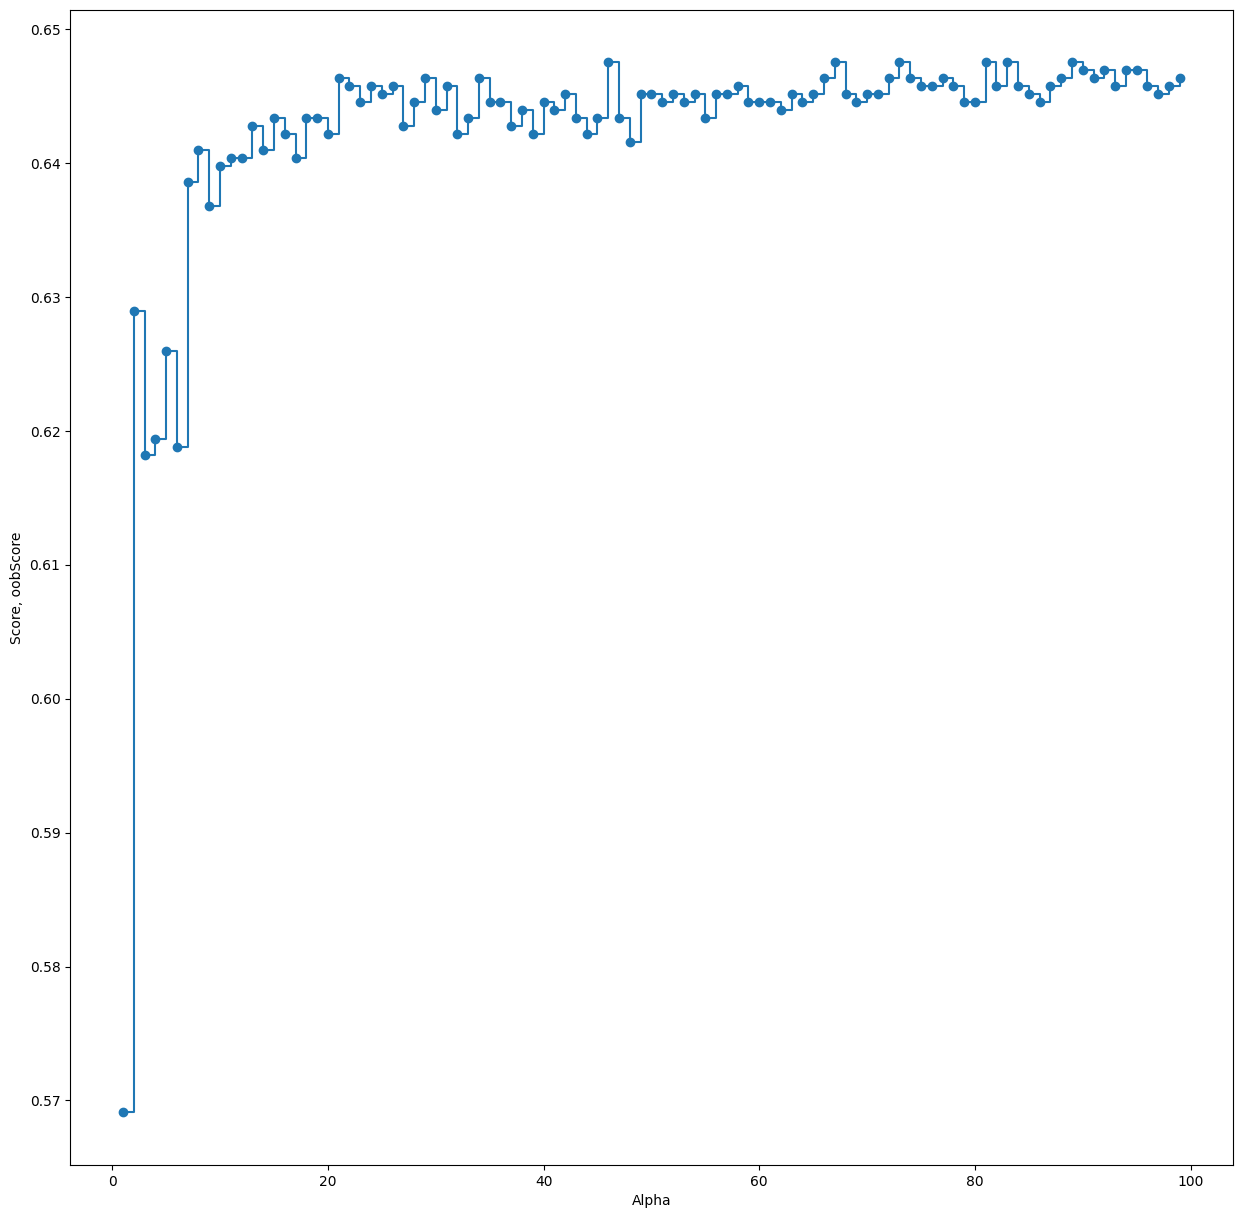

In [21]:
fig, ax =plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Score, oobScore')
ax.plot(adt['Esitmator'], adt['Mean Score'], marker ='o', drawstyle="steps-post", )
plt.show()

In [22]:
adf1 = adt.sort_values(by=['Mean Score'],ascending=False)
ida = adf1.iloc[0,0]

In [23]:
bcta = BaggingClassifier(clfa, n_estimators = ida, max_samples = 0.8, oob_score = True, random_state = 42)
bcta.fit(xtrain, ytrain)

BaggingClassifier(estimator=MLPClassifier(hidden_layer_sizes=(39, 6),
                                          max_iter=600, random_state=42),
                  max_samples=0.8, n_estimators=46, oob_score=True,
                  random_state=42)

In [ ]:
ypred = bcta.predict(xtest)
cm = confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bcta.classes_)
disp.plot()
plt.show()

In [ ]:
bcta.score(xtest,ytest)

In [ ]:
cross_val_score(bcta, x, y, cv = 10).mean()

In [ ]:
max_exp = 100
alv = []    
for i in range(1,max_exp):
    clf = MLPClassifier(random_state=42, max_iter=600,hidden_layer_sizes=(1,i), activation='relu', solver='sgd')
    clf.fit(xtrain, ytrain)
    score = clf.score(xtest, ytest)
    alv.append([i,score])
nn1 = pd.DataFrame(data = alv, columns = ['No of Neurons', 'Mean Score'])

In [ ]:
fig, ax =plt.subplots()
ax.set_xlabel('No of Neurons')
ax.set_ylabel('Score')
ax.plot(nn1['No of Neurons'], nn1['Mean Score'], drawstyle="steps-post")
plt.show()

In [ ]:
nn1s = nn1.sort_values(by=['Mean Score'],ascending=False)
n1 = nn1s.iloc[0,0]
n1

In [ ]:
max_exp = 100
alv = []    
for i in range(1,max_exp):
    clf = MLPClassifier(random_state=42, max_iter=600,hidden_layer_sizes=(i,n1), activation='relu', solver='sgd')
    clf.fit(xtrain, ytrain)
    score = clf.score(xtest, ytest)
    alv.append([i,score])
nnla = pd.DataFrame(data = alv, columns = ['No of Layers', 'Mean Score'])

In [ ]:
fig, ax =plt.subplots()
ax.set_xlabel('No of Layers')
ax.set_ylabel('Score')
ax.plot(nnla['No of Layers'], nnla['Mean Score'], drawstyle="steps-post")
plt.show()

In [ ]:
nnlar = nnla.sort_values(by=['Mean Score'],ascending=False)
n1lar = nnlar.iloc[0,0]
n1lar

In [ ]:
alv = []    
for i in np.arange(0.0001, 0.1, 0.0001, dtype=float):
    clflr = MLPClassifier(random_state=42, max_iter=600,hidden_layer_sizes=(n1lar,n1), learning_rate_init=i, activation='relu', solver='sgd')
    clflr.fit(xtrain, ytrain)
    score = clflr.score(xtest, ytest)
    alv.append([i,score])
nnlr = pd.DataFrame(data = alv, columns = ['Learning Rate', 'Mean Score'])

In [ ]:
fig, ax =plt.subplots()
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Score')
ax.plot(nnlr['Learning Rate'], nnlr['Mean Score'], drawstyle="steps-post")
plt.show()

In [ ]:
nnlrs = nnlr.sort_values(by=['Mean Score'],ascending=False)
n1lr = nnlrs.iloc[0,0]
n1lr

In [ ]:
clfs = MLPClassifier(random_state=42, max_iter=600,hidden_layer_sizes=(n1lar,n1), learning_rate_init = n1lr, activation='relu', solver='sgd')
clfs.fit(xtrain, ytrain)
ypred = clfs.predict(xtest)
cm = confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clfs.classes_)
disp.plot()
plt.show()

In [ ]:
clfs.score(xtest, ytest)

In [ ]:
cross_val_score(clfs, x, y, cv = 10 ).mean()

In [ ]:
max_exp = 100
alv = []    
for i in range(1,max_exp):
    bct = BaggingClassifier(clfs, n_estimators = i, max_samples = 0.8, oob_score = False, random_state = 42)
    bct.fit(xtrain, ytrain)
    score = bct.score(xtest, ytest)
    alv.append([i,score])
adt = pd.DataFrame(data = alv, columns = ['Esitmator', 'Mean Score'])

In [ ]:
fig, ax =plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Score, oobScore')
ax.plot(adt['Esitmator'], adt['Mean Score'], marker ='o', drawstyle="steps-post")
plt.show()

In [ ]:
adf1 = adt.sort_values(by=['Mean Score'],ascending=False)
ida = adf1.iloc[0,0]

In [ ]:
bcts = BaggingClassifier(clfa, n_estimators = ida, max_samples = 0.8, oob_score = True, random_state = 42)
bcts.fit(xtrain, ytrain)

In [ ]:
ypred = bcts.predict(xtest)
cm = confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bcts.classes_)
disp.plot()
plt.show()

In [ ]:
bcts.score(xtest,ytest)

In [ ]:
cross_val_score(bcts, x,y, cv = 10).mean()

**Decision Tree**

In [ ]:
dtf = DecisionTreeClassifier(random_state= 42)
dtf.fit(xtrain, ytrain)

In [ ]:
xr.columns

In [ ]:
plt.figure(figsize = (50,50))
plot_tree(dtf, filled = True, rounded = True,class_names= ['Class 1','Class 2','Class 3','Class 4'],feature_names = xr.columns)

In [ ]:
ypred = dtf.predict(xtest)
cm = confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtf.classes_)
disp.plot()
plt.show()

In [ ]:
dtf.score(xtest, ytest)

In [ ]:
path = dtf.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
daas =[]
for ccp_alpha in ccp_alphas:
    daa = DecisionTreeClassifier(random_state= 42,ccp_alpha = ccp_alpha)
    daa.fit(xtrain, ytrain)
    daas.append(daa)

In [ ]:
trs = [daa.score(xtrain, ytrain) for daa in daas]
tts = [daa.score(xtest, ytest) for daa in daas]   
fig, ax =plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.plot(ccp_alphas, trs,marker ='o', drawstyle="steps-post", label = 'Train')
ax.plot(ccp_alphas, tts,marker ='o', drawstyle="steps-post", label = 'Test')
ax.legend()
plt.show()

In [ ]:
daa = DecisionTreeClassifier(random_state= 42,ccp_alpha = 0.004)
scores = cross_val_score(daa, xtrain , ytrain, cv = 5)
val = pd.DataFrame(data = {'Tree':range(5), 'Acurracy':scores})
val.plot(x = 'Tree', y = "Acurracy")

In [ ]:
alv = []
for ccp_alpha in ccp_alphas:
    daa = DecisionTreeClassifier(random_state= 42,ccp_alpha = ccp_alpha)
    scores = cross_val_score(daa, xtrain , ytrain, cv = 10)
    alv.append([ccp_alpha,np.mean(scores),np.std(scores)])
adf = pd.DataFrame(data = alv, columns = ['Alpha', 'Mean Score', 'Std Score'])
adf.plot(x = 'Alpha', y = 'Mean Score')

In [ ]:
adf = adf.sort_values(by=['Mean Score'],ascending=False)
ida = adf.iloc[0,0]

In [ ]:
pdt = DecisionTreeClassifier(random_state= 42,ccp_alpha = ida)
pdt.fit(xtrain, ytrain)

In [ ]:
ypred = pdt.predict(xtest)
cm = confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pdt.classes_)
disp.plot()
plt.show()

In [ ]:
pdt.score(xtest,ytest)

In [ ]:
(cross_val_score(pdt, x, y, cv = 10)).mean()

In [ ]:
plt.figure(figsize = (50,50))
plot_tree(pdt, filled = True, rounded = True,class_names= ['Class 1','Class 2','Class 3','Class 4'],feature_names = xr.columns)

**Bagging Classifier for Decision Tree**

In [ ]:
max_exp = 100
alv = []    
for i in range(1,max_exp):
    bct = BaggingClassifier(pdt, n_estimators = i, max_samples = 0.8, oob_score = False, random_state = 42)
    bct.fit(xtrain, ytrain)
    score = bct.score(xtest, ytest)
    alv.append([i,score])
adt = pd.DataFrame(data = alv, columns = ['Esitmator', 'Mean Score'])

In [ ]:
fig, ax =plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Score, oobScore')
ax.plot(adt['Esitmator'], adt['Mean Score'], marker ='o', drawstyle="steps-post")
plt.show()

In [ ]:
adt1 = adt.sort_values(by=['Mean Score'],ascending=False)
ida = adt1.iloc[0,0]

In [ ]:
bctf = BaggingClassifier(pdt, n_estimators = ida, max_samples = 0.8, oob_score = True, random_state = 42)
bctf.fit(xtrain, ytrain)

In [ ]:
ypred = bctf.predict(xtest)
cm = confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bctf.classes_)
disp.plot()
plt.show()

In [ ]:
bctf.score(xtest, ytest)

In [ ]:
cross_val_score(bctf, x,y, cv =10).mean()

**Random Forest**

In [ ]:
max_exp = 100
alv = []    
for i in range(1,max_exp):
    rf = RandomForestClassifier(n_estimators = i, random_state = 42)
    rf.fit(xtrain, ytrain)
    score = rf.score(xtest, ytest)
    alv.append([i,score])
adf = pd.DataFrame(data = alv, columns = ['Esitmator', 'Mean Score'])

In [ ]:
adf.plot(x = 'Esitmator', y = 'Mean Score')

In [ ]:
adrf = adf.sort_values(by=['Mean Score'],ascending=False)
ida = adrf.iloc[0,0]

In [ ]:
rf = RandomForestClassifier(n_estimators = ida, random_state = 42)
rf.fit(xtrain, ytrain)

In [ ]:
ypred = rf.predict(xtest)
cm = confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

In [ ]:
rf.score(xtest, ytest)

In [ ]:
(cross_val_score(rf, x, y, cv = 10)).mean()

**Bagging Classifier for Random Forest**

In [ ]:
max_exp = 100
alv = []    
for i in range(1,max_exp):
    bct = BaggingClassifier(rf, n_estimators = i, max_samples = 0.8, oob_score = False, random_state = 42)
    bct.fit(xtrain, ytrain)
    score = bct.score(xtest, ytest)
    alv.append([i,score])
adt = pd.DataFrame(data = alv, columns = ['Esitmator', 'Mean Score'])

In [ ]:
fig, ax =plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Score, oobScore')
ax.plot(adrf['Esitmator'], adrf['Mean Score'], marker ='o', drawstyle="steps-post")
plt.show()

In [ ]:
adf1 = adrf.sort_values(by=['Mean Score'],ascending=False)
ida = adf1.iloc[0,0]

In [ ]:
bcrf = BaggingClassifier(rf, n_estimators = ida, max_samples = 0.8, oob_score = True, random_state = 42)
bcrf.fit(xtrain, ytrain)

In [ ]:
ypred = bcrf.predict(xtest)
confusion_matrix(ypred, ytest)
cm = confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bcrf.classes_)
disp.plot()
plt.show()

In [ ]:
bcrf.score(xtest, ytest)

In [ ]:
(cross_val_score(bcrf, x, y, cv = 10)).mean()

In [ ]:
bctf.score(xtest, ytest)

In [ ]:
(cross_val_score(bctf, x, y, cv = 10)).mean()